# console : mlflow ui
# Accès console MLFlow : http://127.0.0.1:5000
# 1 - Chargement & configuration

In [1]:
import sys
import os
sys.path.append('../src')
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from requirements import *
from src import data_preprocessing as dp
from src import model_training as mt
from src import evaluate as ev
from src import utils

import mlflow
mlflow.set_experiment("Sentiment Analysis Project")

c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




✅ Toutes les librairies sont présentes et prêtes à être utilisées !



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/906586012259731436', creation_time=1742576058928, experiment_id='906586012259731436', last_update_time=1742576058928, lifecycle_stage='active', name='Sentiment Analysis Project', tags={}>

## 1.1 - Affichage de la structure dossier

In [2]:
utils.afficher_structure_dossier("..", max_niveaux = 1)

├── .git
├── ├── COMMIT_EDITMSG
├── ├── FETCH_HEAD
├── ├── HEAD
├── ├── config
├── ├── description
├── ├── hooks
├── ├── index
├── ├── info
├── ├── logs
├── ├── objects
├── └── refs
├── .gitattributes
├── .gitignore
├── README.md
├── data
├── └── tweets.csv
├── env_p7_MLOps
├── ├── Include
├── ├── Lib
├── ├── Scripts
├── ├── etc
├── ├── pyvenv.cfg
├── └── share
├── logs
├── ├── events.out.tfevents.1741361244.PC-ARNAUD.37024.0
├── ├── events.out.tfevents.1741362034.PC-ARNAUD.9628.0
├── ├── events.out.tfevents.1741364804.PC-ARNAUD.38328.0
├── ├── events.out.tfevents.1741507476.PC-ARNAUD.3024.0
├── ├── events.out.tfevents.1741507646.PC-ARNAUD.3024.1
├── ├── events.out.tfevents.1741513667.PC-ARNAUD.13340.0
├── ├── events.out.tfevents.1741599815.PC-ARNAUD.27736.0
├── ├── events.out.tfevents.1741603247.PC-ARNAUD.3852.0
├── ├── events.out.tfevents.1741603852.PC-ARNAUD.24400.0
├── ├── events.out.tfevents.1741604981.PC-ARNAUD.29024.0
├── ├── events.out.tfevents.1741609885.PC-ARNAUD.30608.0
├── 

## 1.2 - Chargement des données

In [3]:
print(f"📂 Répertoire courant : {os.getcwd()}")

📂 Répertoire courant : c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\notebooks


In [4]:
data_path = "../data/tweets.csv"
if os.path.exists(data_path):
    tweets = pd.read_csv(data_path, encoding = "ISO-8859-1")
    print("✅ Dataset chargé avec succès !")
else:
    print("❌ Le fichier tweets.csv est introuvable.")

✅ Dataset chargé avec succès !


# 2 - Exploration & nettoyage
## 2.1 - Nettoyage initial

In [5]:
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [6]:
# Renommage des colonnes
tweets.columns = ["label", "id", "date", "query", "user", "text"]

In [7]:
# Suppression des colonnes inutiles
tweets = tweets.drop(columns=["id", "date", "query", "user"])

In [8]:
# Conversion des labels (0 et 4 → 0 et 1)
tweets['label'] = tweets['label'].map({0: 0, 4: 1})

## 2.2 - Suppression des doublons sur la colonne "text"

In [9]:
before = len(tweets)
tweets = tweets.drop_duplicates(subset = ["text"], keep = "first").reset_index(drop = True)
after = len(tweets)
print(f"✅ Suppression des doublons effectuée : {before - after} doublons supprimés.")
tweets = tweets.reset_index(drop = True)

✅ Suppression des doublons effectuée : 18534 doublons supprimés.


## 2.3 - Nettoyage avancé

In [10]:
tweets_cleaned = dp.preprocess_tweets_parallel(tweets)

🚀 Nouveau run démarré : 23b736ab4d67440e87f24a7012c1cc1c
✅ Chargement des tweets nettoyés depuis ../models_saved/cleaned_tweets.pkl
✅ Run terminé.


# 3 - Vader scoring

In [11]:
vader_scores = dp.compute_vader_scores(tweets_cleaned)

🚀 Nouveau run démarré : 32f210daac7d4e299f7ec9b1cdd8af3f
✅ Scores VADER chargés depuis ../models_saved/vader_scores.pkl...

📊 Rapport de classification VADER :
              precision    recall  f1-score   support

           0       0.81      0.43      0.56    790184
           1       0.61      0.90      0.73    791281

    accuracy                           0.67   1581465
   macro avg       0.71      0.67      0.65   1581465
weighted avg       0.71      0.67      0.65   1581465

✅ Run terminé.


# 4 - Vectorisation des tweets

In [12]:
sample_size = 15000  # Taille échantillon USE (modifiable)

tweets_sampled = tweets_cleaned.sample(n = sample_size, random_state = 70).reset_index(drop = True)

X_bow, X_tfidf, X_fasttext, X_use, y_use = dp.vectorize_and_save(
    tweets_cleaned['text'], tweets_sampled['text'],
    tweets_cleaned['label'], tweets_sampled['label']
)

🚀 Nouveau run démarré : f894ba6b668040d1868b620224dccd6e
📂 Chargement des matrices vectorisées existantes...
✅ Run terminé.


# 5 - Modélisation Classique (TF-IDF + Régression Logistique)

In [ ]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_tfidf, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify=tweets_cleaned['label']
)
# log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train)
log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train, force_retrain = True)

🚀 Nouveau run démarré : ebf4c44836e24637bb5aa30a72706b55
✅ Modèle Régression Logistique déjà existant. Chargement...
✅ Run terminé.


# 6 - Modèles Avancés (Random Forest / LightGBM / LSTM)
## 6.1 - FastText + Random Forest

In [ ]:
X_ft_train, X_ft_test, y_train, y_test = train_test_split(
    X_fasttext, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify = tweets_cleaned['label']
)
# rf_model = mt.train_random_forest(X_ft_train, y_train)
rf_model = mt.train_random_forest(X_ft_train, y_train, force_retrain = True)

🚀 Nouveau run démarré : e494d55ae4ff425a8caf35fe84cc1fc9
✅ Modèle RandomForest déjà existant. Chargement...
✅ Run terminé.


## 6.2 - FastText + LSTM

In [ ]:
# lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'])
lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'], force_retrain = True)

🚀 Nouveau run démarré : 2ec12602317e40f189887428c2f99654


✅ Modèle LSTM déjà existant. Chargement...
✅ Run terminé.


## 6.3 - USE + LightGBM

In [ ]:
X_use_train, X_use_test, y_use_train, y_use_test = train_test_split(
    X_use, y_use, test_size = 0.2, random_state = 70, stratify = y_use
)
# lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test)
lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test, force_retrain = True)

🚀 Nouveau run démarré : e1c5e666c49542f28c899f466f63ed34
✅ Modèle LightGBM existant. Chargement...
✅ Run terminé.


## 6.4 - DistilBERT
### 6.4.1 - Préparation

In [17]:
df_sample = dp.prepare_distilbert_dataset(tweets_cleaned)
tokenized = dp.tokenize_distilbert_dataset(df_sample)

🚀 Nouveau run démarré : 4beb772948894d6495af94597142f61d
✅ Dataset DistilBERT existant. Chargement...
✅ Run terminé.
🚀 Nouveau run démarré : af4de9d6cd3148899ddd76f7b0fe1a7b
✅ Tokenized dataset déjà existant. Chargement depuis ../models_saved/tokenized_distilbert_dataset...
✅ Run terminé.


### 6.2.2 - Fine-tuning 

In [ ]:
model, trainer, _ = mt.train_distilbert_model(tokenized)
# model, trainer, _ = mt.train_distilbert_model(tokenized, force_retrain = True)

🚀 Nouveau run démarré : 589fe6de85c5476482d3b102c3f4af93
✅ Modèle DistilBERT déjà fine-tuné. Chargement depuis ../models_saved/distilbert_model...
✅ Run terminé.


# 7 - Evaluation

In [19]:
distilbert_acc, distilbert_f1 = ev.evaluate_distilbert_model(model, tokenized)

🚀 Nouveau run démarré : c5151e2b35774e31bcc080b68694df81
✅ Résultats d'évaluation déjà disponibles. Chargement...

📊 Rapport DistilBERT :
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     10038
           1       0.84      0.85      0.84      9962

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000

✅ Run terminé.


# 8 - Comparaison finale des modèles

In [20]:
models_dict = {
    'logreg': log_reg_model,
    'rf': rf_model,
    'lstm': lstm_model,
    'lgbm': lgbm_model,
    'distilbert_metrics': {
        'accuracy': distilbert_acc,
        'f1': distilbert_f1
    }
}

datasets_dict = {
    'tfidf': {'X_test': X_tfidf_test, 'y_test': y_test},
    'fasttext': {'X_test': X_ft_test, 'y_test': y_test},
    'lstm': (X_ft_test_reshaped, y_ft_test),
    'use': {'X_test': X_use_test, 'y_test': y_use_test}
}

🚀 Nouveau run démarré : b3a4c9f19902487da85a0d6e56944f2d

📊 Résultats pour : logreg
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    158037
           1       0.74      0.79      0.76    158256

    accuracy                           0.76    316293
   macro avg       0.76      0.76      0.76    316293
weighted avg       0.76      0.76      0.76    316293



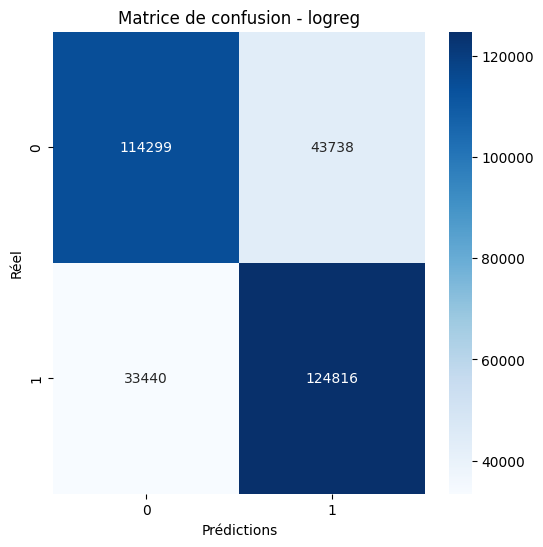


📊 Résultats pour : rf
              precision    recall  f1-score   support

           0       0.50      0.81      0.62    158037
           1       0.49      0.18      0.27    158256

    accuracy                           0.50    316293
   macro avg       0.49      0.50      0.44    316293
weighted avg       0.49      0.50      0.44    316293



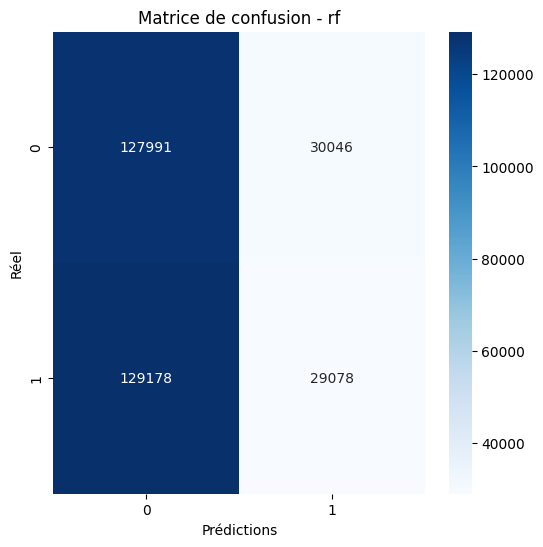

9885/9885 ━━━━━━━━━━━━━━━━━━━━ 8s 747us/step

📊 Résultats pour : lstm
              precision    recall  f1-score   support

           0       0.51      0.95      0.66    158037
           1       0.61      0.08      0.14    158256

    accuracy                           0.51    316293
   macro avg       0.56      0.51      0.40    316293
weighted avg       0.56      0.51      0.40    316293



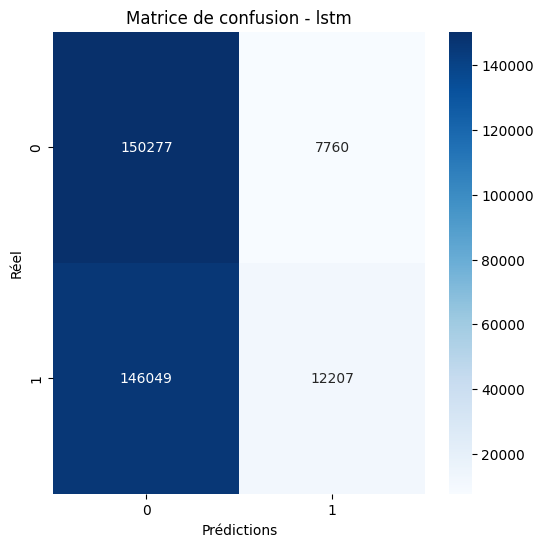


📊 Résultats pour : lgbm
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1505
           1       0.72      0.74      0.73      1495

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000



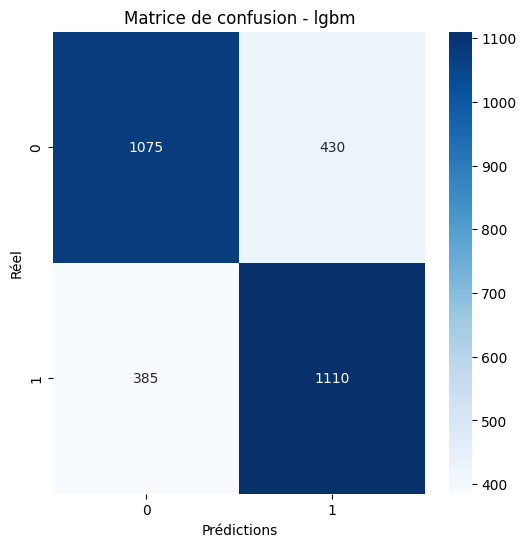


📊 Comparaison finale des modèles :


,Modèle,Accuracy,F1-score
0,logreg,0.7560,0.7638
1,rf,0.4966,0.2675
2,lstm,0.5137,0.1370
3,lgbm,0.7283,0.7315
4,DistilBERT fine-tuné,0.8423,0.8427


✅ Run terminé.


In [21]:
df_results = ev.get_all_model_scores(models_dict, datasets_dict)

# 9 - Tracking MLFlow

In [22]:
y_pred = log_reg_model.predict(X_tfidf_test)
mlflow.log_param("model", "Logistic Regression")
mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
mlflow.log_metric("f1_score", f1_score(y_test, y_pred))

In [23]:
if mlflow.active_run() is not None:
    mlflow.end_run()

In [24]:
with mlflow.start_run():
    # entraînement modèle, log params & metrics
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

# A désactiver en production

In [25]:
utils.launch_mlflow_ui()

🚀 MLFlow UI lancé sur http://127.0.0.1:5000


In [26]:
# mlflow.end_run()  # Pour stopper tout run en cours
